In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ANALISIS COMPORTAMIENTO ASOCIADO AL INTERNET CON LOS DEMAS SERVICIOS DE COMUNICACIÓN.

In [3]:
serv_comunicacion = pd.read_csv ("Datasets limpios/servicios de comunicacion por año.csv", delimiter=",")

In [4]:
#convertir las variables año y trimestre a variables categoricas
serv_comunicacion['año'] = serv_comunicacion['año'].astype(str)
serv_comunicacion['trimestre'] = serv_comunicacion['trimestre'].astype(str)

ANÁLISIS SERVICIOS DE TELECOMUNICACIONES EN ARGENTINA 2015-2022
Para este análisis utilizamos un data set que agrupa el total nacional de acceosos a cada servicio de telecomunicaciones en argentina con registros del 2015 al 2022 agrupados por trimestres. (los registros se encuentran en Millones de accesos)
ejemplo en el año 2022 en su trimestre 3 el total de accesos es de 11.091128 millones

In [5]:
serv_comunicacion.head(3)

,año,trimestre,total internet,total tel fija,total tel movil,total tv paga
0,2022,2,10.958684,7.633074,59.502291,9.712221
1,2022,1,10.624009,7.664854,59.402581,9.614455
2,2021,4,10.489794,7.626355,59.065827,9.606975


In [6]:
#generar el informe univariado de las variables
serv_comunicacion.describe()

,total internet,total tel fija,total tel movil,total tv paga
count,30.000000,30.000000,30.000000,30.000000
mean,8.442509,8.904478,59.289300,9.427972
std,1.251441,1.294844,2.748803,0.261609
min,6.737732,7.003303,54.619886,8.904830
25%,7.265218,7.628035,57.055694,9.186458
50%,8.410345,9.680955,59.434487,9.439201
75%,9.308320,10.119422,61.753198,9.644059
max,10.958684,10.379749,63.719805,9.824463


El data set contiene 31 registros con el total de accesos a los 4 principales servicios de telecomunicaciones en Argentina, estos registros van del año 2015 al 2022 divididos en trimestres.
Como se observa la telefonia movil es el servicio con mayor cantidad de accesos, comparado con los otros tres servcios es el medio que mas accesos tiene con mas de 63 millones de accesos minetras que internet, telefonia fija y tv de paga no se encuentran muy lejos entre si.

<function matplotlib.pyplot.show(close=None, block=None)>

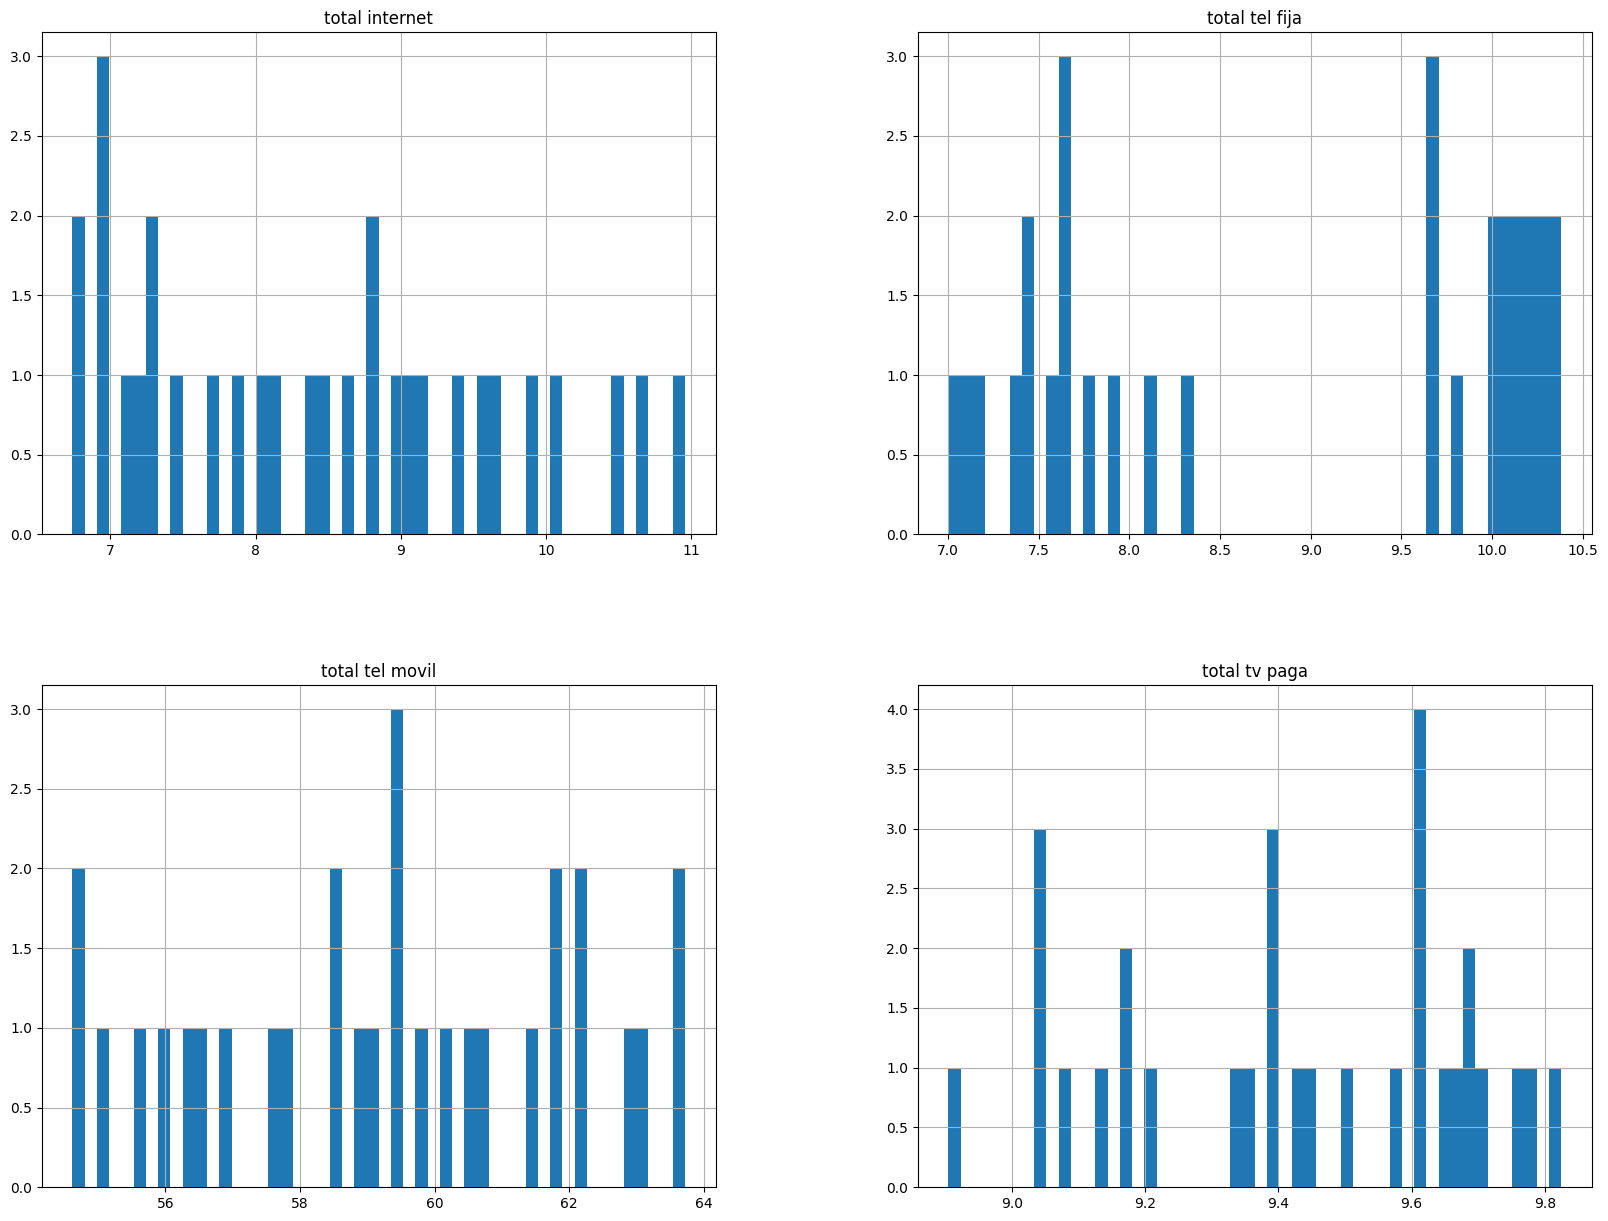

In [7]:
serv_comunicacion.hist(bins = 50, figsize = (20,15)) 
plt.show

En los histogramas vemos las distribuciones de cada uno de los servicios de telecomunicaciones, podemos ver que internet es multimodal lo que nos indica que tienen mas de una fuente de variabilidad. dado que los datos estan tomados por año podemos intuir que existen factores que contrribuyeron a la variabilidad de los accesos a internet a travez de los años.

Veamos si existe algun tipo de relación entre el servicio de internet con los demas servicios de telecomunicaciones.

C:\Users\Crist\AppData\Local\Temp\ipykernel_20156\2842297035.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = serv_comunicacion.corr()


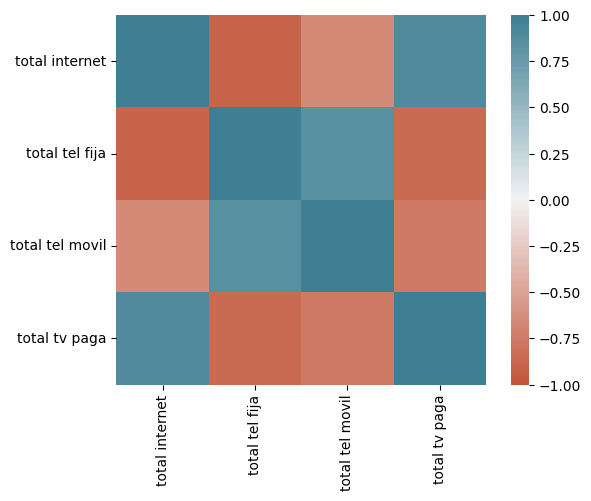

In [8]:
corr_matrix = serv_comunicacion.corr() 
hacha = sns.heatmap( 
    corr_matrix, 
    vmin=-1, vmax=1, center=0, 
    cmap=sns.diverging_palette(20, 220, n=200), 
    square=True 
)

El mapa de calor nos muestra que existen correlaciones entre el servicio de internet y los demas servicios de telecomunicaciones, podemos verlo a continuación con los valores exactos de correlación.

In [9]:
serv_comunicacion.corr().round(2)

C:\Users\Crist\AppData\Local\Temp\ipykernel_20156\57417969.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  serv_comunicacion.corr().round(2)


,total internet,total tel fija,total tel movil,total tv paga
total internet,1.00,-0.89,-0.65,0.88
total tel fija,-0.89,1.00,0.85,-0.86
total tel movil,-0.65,0.85,1.00,-0.75
total tv paga,0.88,-0.86,-0.75,1.00


Nuestro eje de análisis es el servicio de internet el cual vamos correlacionar con los demas servicios de telecomunicaciones. como se observa tanto en el gráfico como en la tabla existen correlaciones:
Internet - Telefonia fija : tienen una correlacion inversa muy fuerte, esto indica que cuando aumenta una la  otra disminuye.
Internet - Telefoni movil : grado de correlaciónmoderado inverso. no es muy marcada la variacion, es decir que aunque un aumento de accesos a la telefonia movil puede incidir en una disminución de los accesos a internet, esta variación es moderada.
Internet - Tv paga : correlacion directa muy fuerte, esto nos indica que el aumento a los accesos a la tv paga han significado un fuerte aumento a los accesos a internet y viceversa.

El análisis anterior nos permite usar el comportamineto de la telefonia fija y la tv paga como varaibles que permitan tomar acciones sobre el comportamiento del acceso a internet.

ANALISIS DE LAS VARIABLES ASOCIADAS AL SERVICIO DE INTERNET EN ARGENTINA.(/n)

Para este análisis utilizamos un data set que reune las variables asociadas al servicio de internet como lo es la penetración del servicio, el tipo de acceso, la tecnologia de acceso y la velocidad media de descarga. Los registros se encuentran por provincia y van del año 2014 al 2022 divididos por trimestres. Los registros fueron normalizados a porcentaje de la población. ejemplo el valor de 26.83 de la banda ancha fija indica que el 26.83% de la poblacion de esa provincia tiene acceso a banda ancha fija en el año 2022 en el segundo trimestre.

In [10]:
internet_provincias = pd.read_csv ("Datasets limpios/internet_provincias.csv", delimiter=",")

In [11]:
internet_provincias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   año                           840 non-null    int64  
 1   trimestre                     840 non-null    int64  
 2   provincia                     840 non-null    object 
 3   accesos por cada 100 hogares  840 non-null    float64
 4   banda ancha fija              840 non-null    float64
 5   dial up                       840 non-null    float64
 6   adsl                          840 non-null    float64
 7   cablemodem                    840 non-null    float64
 8   fibra óptica                  840 non-null    float64
 9   wireless                      840 non-null    float64
 10  otros                         840 non-null    float64
 11  mbps (media de bajada)        840 non-null    int64  
 12  poblacion                     840 non-null    float64
dtypes: fl

In [12]:
#convertimos las variables año y trimestre a variables categoricas
internet_provincias['año'] = internet_provincias['año'].astype(str)
internet_provincias['trimestre'] = internet_provincias['trimestre'].astype(str)

In [13]:
internet_provincias.head(3)

,año,trimestre,provincia,accesos por cada 100 hogares,banda ancha fija,dial up,adsl,cablemodem,fibra óptica,wireless,otros,mbps (media de bajada),poblacion
0,2022,3,Buenos Aires,78.11,26.838184,0.035282,1.933113,15.642146,8.175487,0.721946,0.400774,70,17.57
1,2022,3,Capital Federal,122.28,49.536346,0.068750,4.512532,39.747596,4.141603,0.184551,1.018814,101,3.12
2,2022,3,Catamarca,65.33,16.346977,0.000233,2.327907,2.440698,10.749767,0.309070,0.519767,61,0.43


teniendo en cuenta que nuestro caso se situa en el segundo trimestre de 2022 eliminaremos los registros del tercer trimestre del 2022 con los que contamos.

In [14]:
#eliminar la columna población
internet_provincias = internet_provincias.drop('poblacion', axis=1)

In [15]:
#exportar el data frame como csv 
internet_provincias.to_csv('Datasets limpios/internet por provincia estandarizado 2022_3.csv', index=False)

In [16]:
#eliminar los registros del tercer trimestre del 2022
internet_provincias = internet_provincias.drop(
    internet_provincias[(internet_provincias['año'] == "2022") & (internet_provincias['trimestre'] == "3")].index)

In [17]:
internet_provincias.head()

,año,trimestre,provincia,accesos por cada 100 hogares,banda ancha fija,dial up,adsl,cablemodem,fibra óptica,wireless,otros,mbps (media de bajada)
24,2022,2,Buenos Aires,77.58,26.528082,0.035282,1.995743,15.478731,7.962681,0.721952,0.404257,66
25,2022,2,Capital Federal,121.31,49.186731,0.068750,4.663173,39.494423,3.894423,0.184519,1.018942,94
26,2022,2,Catamarca,62.40,15.583023,0.000233,2.773953,2.193023,9.787674,0.309070,0.519535,57
27,2022,2,Chaco,43.79,12.592895,0.000439,2.592281,5.375789,3.701228,0.717368,0.206667,51
28,2022,2,Chubut,83.19,26.983500,0.150667,7.562833,11.540333,1.595667,4.964000,1.471333,15


In [18]:
#exportar el data frame como csv 
internet_provincias.to_csv('Datasets limpios/internet por provincia estandarizado.csv', index=False)

Haremos una descripcion univariable de las columnas numericas de nuestro data frame

In [19]:
internet_provincias.describe().round(2)

,accesos por cada 100 hogares,banda ancha fija,dial up,adsl,cablemodem,fibra óptica,wireless,otros,mbps (media de bajada)
count,816.00,816.00,816.00,816.00,816.00,816.00,816.00,816.00,816.00
mean,48.49,15.06,0.07,6.46,6.29,0.86,0.98,0.55,13.09
std,22.98,9.32,0.11,3.14,7.45,1.45,1.94,1.06,13.75
min,9.35,2.82,0.00,1.27,0.00,0.00,0.00,0.00,3.00
25%,31.91,9.03,0.00,4.23,1.20,0.01,0.04,0.02,4.00
50%,45.39,13.30,0.01,5.87,4.29,0.16,0.26,0.18,7.00
75%,61.13,18.72,0.09,8.55,8.22,1.07,1.46,0.60,17.00
max,124.06,55.48,0.55,21.44,41.70,9.79,14.40,8.16,94.00


<function matplotlib.pyplot.show(close=None, block=None)>

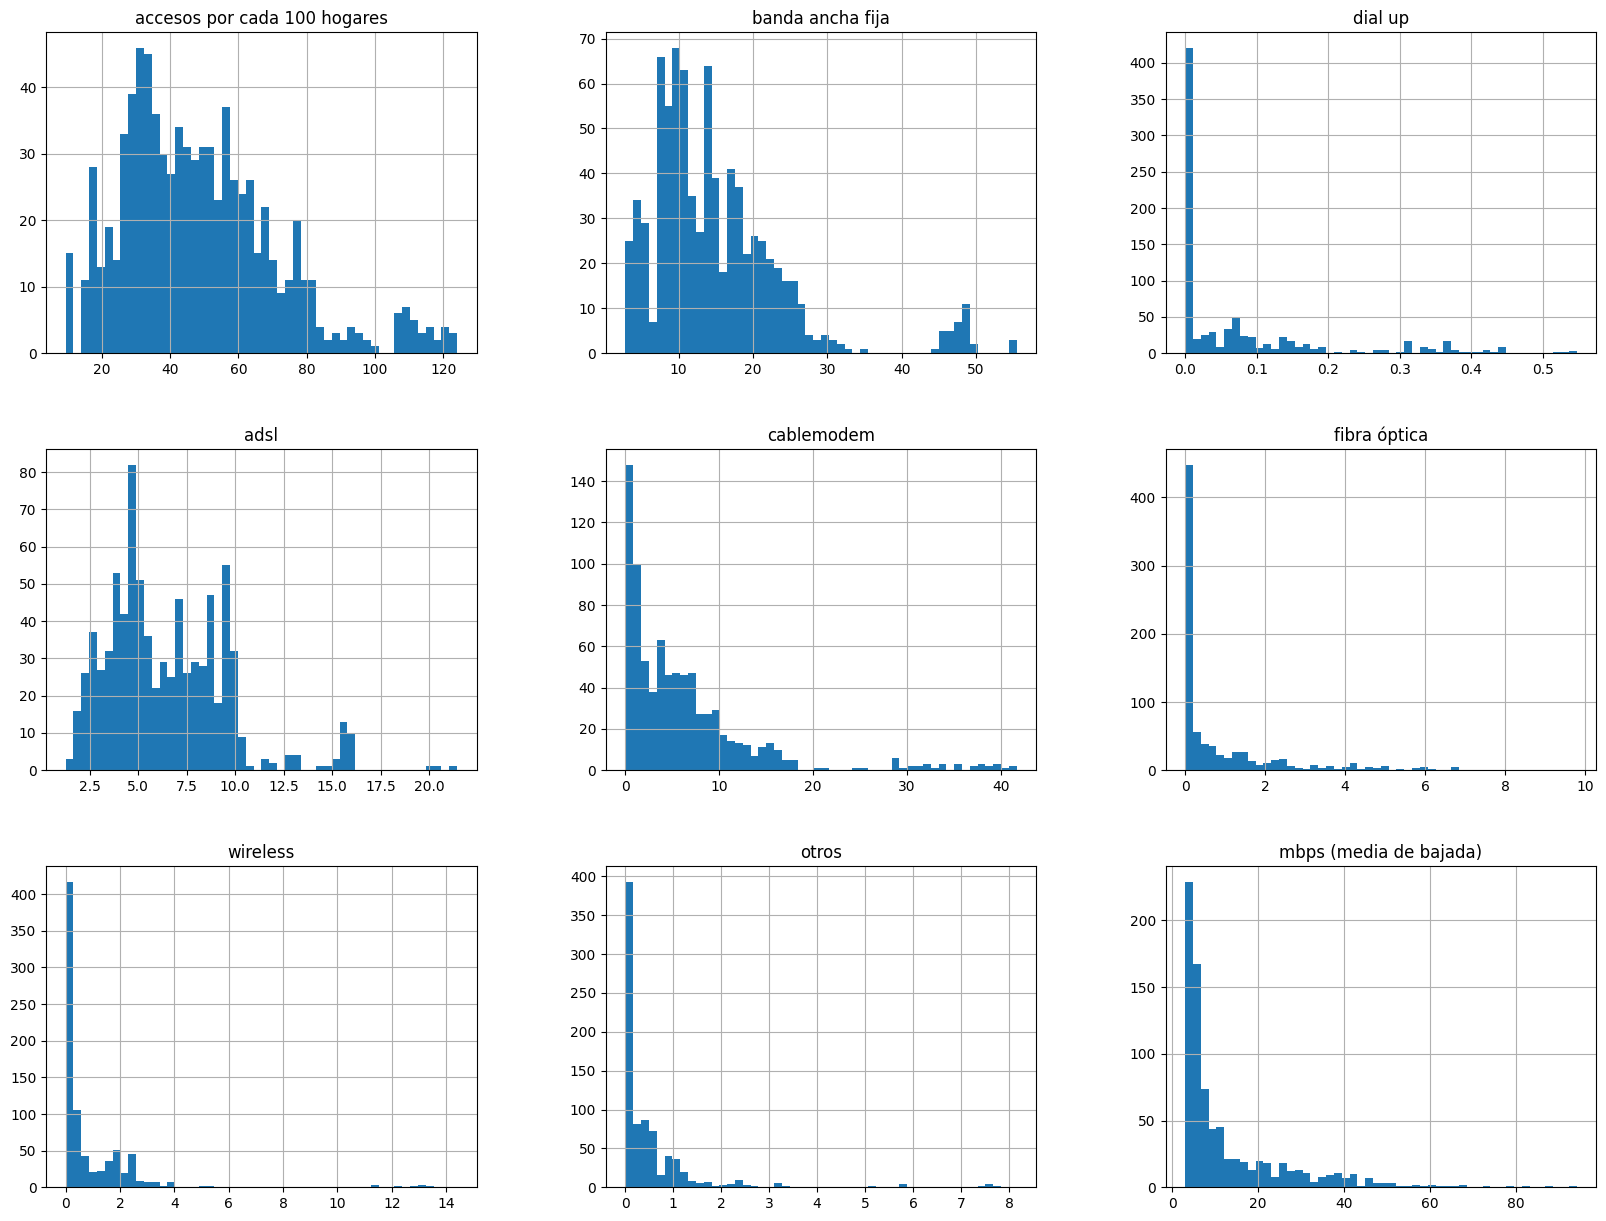

In [20]:
internet_provincias.hist(bins = 50, figsize = (20,15)) 
plt.show

ANÁLISIS UNIVARIADO DE LOS COMPONENTES ASOCIADOS AL SERVICIO DE INTERNET EN ARGENTINA.

ACCESOS POR CADA 100 HOGARES:  al tener una media y mediana cercanas, se evidencia que la distribución de la variable está relativamente simétrica, pero al mismo tiempo la desviación estándar indica una gran variabilidad entre los datos esto se debe a que hay una gran diferencia entre el valor minimo y el maximo, lo que nos indica que del año 2015 al 2022 el acceso de los hogares a internet a aumentado considerablemente.

ACCESOS A BANDA ANCHA FIJA: alrededor del 15% de los habitantes tienen acceso a internet de alta velocidad en Argentina. La desviación estándar de 9.32% indica que los valores están bastante dispersos alrededor del promedio. Esto puede deberse a variaciones en la infraestructura de internet en diferentes provincias, así como a diferencias en la adopción de tecnología de internet por parte de los hogares. El valor mínimo de acceso a banda ancha es del 2.82%, lo que sugiere que algunas provincias tienen un nivel muy bajo de acceso a internet de alta velocidad en comparación con el promedio nacional.El valor máximo de acceso a banda ancha es del 124.06%, lo cual puede parecer sorprendente. Sin embargo, es importante tener en cuenta que puede haber algunas provincias con valores atípicos debido a factores como la infraestructura de internet en zonas turísticas o la presencia de empresas tecnológicas importantes. La presencia de valores extremos (el valor mínimo es 2.82% y el valor máximo es 124.06%) sugiere que hay algunas provincias con niveles de acceso a banda ancha muy bajos o muy altos en comparación con el promedio.

DIAL UP: Esta variable corresponde al acceso por banda angosta a internet, como se observa los porcentajes de accesos son muyu bajos lo que nos permite eliminar esta variable por que indica que esta proxima a desaparecer. 

ADSL: En promedio, alrededor del 6% de los hogares tienen acceso a internet a través de ADSL en Argentina. Esto es significativamente menor que el promedio de acceso a banda ancha en general. La desviación estándar de 3.14% indica que los valores están relativamente dispersos alrededor del promedio. Esto puede deberse a diferencias en la infraestructura de internet en diferentes provincias, así como a diferencias en la adopción de tecnología de internet por parte de los hogares. El valor mínimo de acceso por ADSL es del 1.27%, lo que sugiere que algunas provincias tienen niveles muy bajos de acceso a internet a través de ADSL en comparación con el promedio nacional. El valor máximo de acceso por ADSL es del 21.44%, lo que sugiere que hay algunas provincias donde el acceso a internet a través de ADSL es relativamente alto en comparación con el promedio nacional. En resumen, la variable "porcentaje de accesos por ADSL" es una medida importante de la adopción de tecnología de internet en Argentina, específicamente a través de la tecnología ADSL. Los valores extremos pueden reflejar factores únicos de cada provincia que influyen en la adopción de tecnología de internet a través de esta tecnología en particular. Los valores más bajos indican que algunas provincias tienen niveles muy bajos de acceso a internet a través de ADSL, mientras que los valores más altos sugieren que hay algunas provincias donde esta tecnología es relativamente popular en comparación con el promedio nacional.

CABLEMODEM : En promedio, alrededor del 6% de los hogares tienen acceso a internet a través de esta tecnología. La desviación estándar de 7.45% indica que los valores están bastante dispersos alrededor del promedio. Esto puede deberse a variaciones en la infraestructura de internet en diferentes provincias, así como a diferencias en la adopción de tecnología de internet por parte de los hogares. Los valores extremos pueden reflejar factores únicos de cada provincia que influyen en la adopción de tecnología de internet a través de esta tecnología en particular. El hecho de que algunas provincias no tengan acceso a internet a través de esta tecnología en absoluto indica que puede haber limitaciones en la infraestructura de internet en esas áreas.

FIBRA ÓPTICA: en promedio, menos del 1% de los hogares tienen acceso a internet a través de esta tecnología en Argentina. La desviación estándar de 1.45% indica que los valores están bastante dispersos alrededor del promedio. Esto puede deberse a variaciones en la infraestructura de internet en diferentes provincias, así como a diferencias en la adopción de tecnología de internet por parte de los hogares. Los valores extremos pueden reflejar factores únicos de cada provincia que influyen en la adopción de tecnología de internet a través de esta tecnología en particular. El hecho de que algunas provincias no tengan acceso a internet a través de esta tecnología en absoluto indica que puede haber limitaciones en la infraestructura de internet en esas áreas. En general, el promedio de acceso por fibra óptica es mucho menor que el promedio de acceso por banda ancha en general, lo que sugiere que hay margen de mejora en la adopción de esta tecnología en Argentina.

VELOCIDAD MEDIA DE BAJADA: en promedio, la velocidad de descarga de internet en Argentina es relativamente baja con un promedio de 13.09 mbps. La desviación estándar de 13.75 Mbps indica que los valores están bastante dispersos alrededor del promedio. Esto puede deberse a variaciones en la infraestructura de internet en diferentes provincias, así como a diferencias en los planes de internet ofrecidos por los proveedores de servicios de internet ISP. En resumen, la variable "velocidad media de bajada" es una medida importante de la calidad de la conexión a internet en Argentina, específicamente en términos de velocidad de descarga. Los valores extremos pueden reflejar factores únicos de cada provincia que influyen en la calidad de la conexión a internet, como la infraestructura de internet o los planes de internet ofrecidos por los proveedores de servicios de internet. El hecho de que algunas provincias tengan una velocidad de descarga bastante baja indica que puede haber limitaciones en la infraestructura de internet en esas áreas. En general, el promedio de velocidad de bajada es relativamente bajo en comparación con los estándares internacionales, lo que sugiere que hay margen de mejora en la calidad de la conexión a internet en Argentina.

En general, el análisis de los datos indican que la calidad de la conexión a internet en Argentina es variable. La variable "porcentaje de accesos a banda ancha" indica que el acceso a internet en general está relativamente extendido en Argentina, con un promedio del 15.06%. Sin embargo, las variables que analizan los diferentes tipos de acceso a internet muestran que hay una gran variabilidad en la calidad de la conexión. La velocidad de descarga promedio es de solo 13.09 Mbps, lo que sugiere que la calidad de la conexión es relativamente baja en comparación con los estándares internacionales.

En cuanto a los diferentes tipos de acceso a internet, la variable "acceso por ADSL" tiene un promedio de 6.46 Mbps, lo que indica que es relativamente lento en comparación con los otros tipos de acceso. El acceso por "cable módem" es un poco más rápido, con un promedio de 6.29 Mbps. La variable "acceso por fibra óptica" muestra un promedio de solo 0.86 Mbps, lo que sugiere que este tipo de acceso es menos común en Argentina o solo está disponible en áreas muy limitadas.

Es importante señalar que estos resultados varían según la provincia. Por ejemplo, algunas provincias tienen una velocidad de descarga relativamente alta, mientras que otras tienen una velocidad de descarga extremadamente baja. Esto sugiere que la calidad de la conexión a internet puede variar según la infraestructura de internet disponible en cada provincia y la calidad del servicio ofrecido por los proveedores de servicios de internet.

En resumen, los datos sugieren que la calidad de la conexión a internet en Argentina es variable y que la velocidad de descarga promedio es relativamente baja en comparación con los estándares internacionales. Es importante seguir trabajando en la mejora de la infraestructura de internet en todo el país para mejorar la calidad de la conexión y reducir las disparidades entre las diferentes provincias.

ANÁLISIS MULTIVARIADO DE ACCESOS A INTERET POR PROVINCIAS.

C:\Users\Crist\AppData\Local\Temp\ipykernel_20156\1685883204.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = internet_provincias.corr()


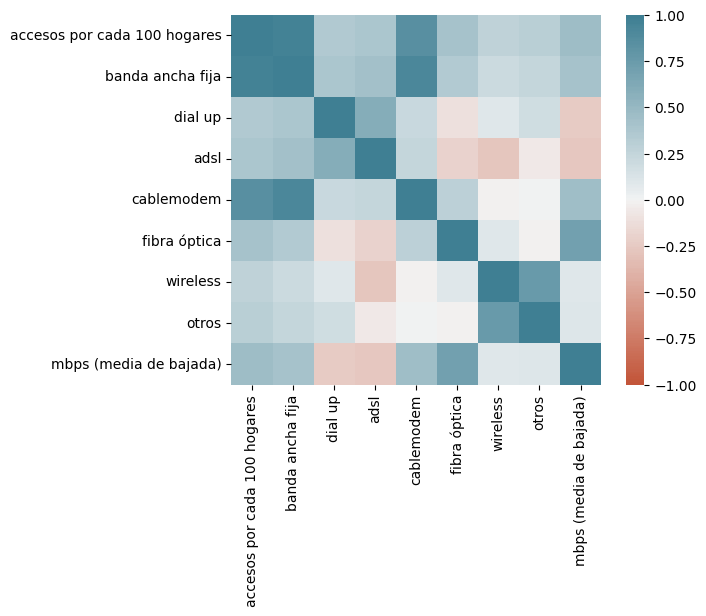

In [21]:
corr_matrix = internet_provincias.corr() 
hacha = sns.heatmap( 
    corr_matrix, 
    vmin=-1, vmax=1, center=0, 
    cmap=sns.diverging_palette(20, 220, n=200), 
    square=True 
)

In [22]:
internet_provincias.corr()

C:\Users\Crist\AppData\Local\Temp\ipykernel_20156\3702607445.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  internet_provincias.corr()


,accesos por cada 100 hogares,banda ancha fija,dial up,adsl,cablemodem,fibra óptica,wireless,otros,mbps (media de bajada)
accesos por cada 100 hogares,1.000000,0.965593,0.357612,0.388489,0.854768,0.414696,0.273535,0.308081,0.461506
banda ancha fija,0.965593,1.000000,0.384461,0.431043,0.920904,0.343339,0.203370,0.249440,0.413789
dial up,0.357612,0.384461,1.000000,0.592492,0.219274,-0.109839,0.089860,0.179873,-0.246532
adsl,0.388489,0.431043,0.592492,1.000000,0.244086,-0.195060,-0.270510,-0.056658,-0.263000
cablemodem,0.854768,0.920904,0.219274,0.244086,1.000000,0.294434,-0.014987,0.001480,0.449348
fibra óptica,0.414696,0.343339,-0.109839,-0.195060,0.294434,1.000000,0.086026,-0.008407,0.695849
wireless,0.273535,0.203370,0.089860,-0.270510,-0.014987,0.086026,1.000000,0.752424,0.097082
otros,0.308081,0.249440,0.179873,-0.056658,0.001480,-0.008407,0.752424,1.000000,0.104892
mbps (media de bajada),0.461506,0.413789,-0.246532,-0.263000,0.449348,0.695849,0.097082,0.104892,1.000000


Como era de esperar existe una correlacion fuerte entre el acceso a internet en los hogares, los accesos a banda ancha y a los tipos de tecnologia de accesos a internet, esto claramente nos indica que un aumento en el acceso a banda ancha genera un aumento en el acceso a internet en los hogares.(/n)

Otro dato de interes es la correlación entre el acceso por fibra óptica y la velocidad media de bajada, lo cual indica que un aumento en los accesos a internet de banda ancha mediante fibra optica implican un amuento en la velociadad media de bajada. También se observa que la conección por ADSL tienen una correlación inversa debil con la velocidad medida de bajada, esto implica que si bajan las conecciones mediante ADSL puede aumentar la velocidad media de bajada.